## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   0.472473   841.493628  0.418683  7.035652  1.504090
1  64.620261   787.076656  0.838671  8.125572  1.391659
2  69.706484   136.014826  0.711649  4.725870  0.965518
3   1.768552  1286.796045  0.646904  7.774996  1.551187
4  20.699187  1242.955470  0.847671  3.829646  1.410661


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9809737	total: 54.1ms	remaining: 54s
1:	learn: 0.9720830	total: 55.2ms	remaining: 27.5s
2:	learn: 0.9625047	total: 56.2ms	remaining: 18.7s
3:	learn: 0.9506613	total: 57.3ms	remaining: 14.3s
4:	learn: 0.9410112	total: 58.3ms	remaining: 11.6s
5:	learn: 0.9329999	total: 59.2ms	remaining: 9.8s
6:	learn: 0.9228782	total: 60ms	remaining: 8.51s
7:	learn: 0.9127829	total: 61ms	remaining: 7.57s
8:	learn: 0.9017448	total: 61.6ms	remaining: 6.79s
9:	learn: 0.8924556	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8827178	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8724802	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8634276	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8537836	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8450635	total: 65ms	remaining: 4.27s
15:	learn: 0.8367658	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8281430	total: 66.3ms	remaining: 3.84s
17:	learn: 0.8207299	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8120994	total: 67.4ms	remaining: 3.48s
1

31:	learn: 0.7128380	total: 73.2ms	remaining: 2.21s
32:	learn: 0.7061566	total: 74.1ms	remaining: 2.17s
33:	learn: 0.6994659	total: 74.5ms	remaining: 2.12s
34:	learn: 0.6925831	total: 74.9ms	remaining: 2.06s
35:	learn: 0.6879830	total: 75.4ms	remaining: 2.02s
36:	learn: 0.6818216	total: 75.8ms	remaining: 1.97s
37:	learn: 0.6747249	total: 76.1ms	remaining: 1.93s
38:	learn: 0.6680193	total: 76.7ms	remaining: 1.89s
39:	learn: 0.6609548	total: 77.2ms	remaining: 1.85s
40:	learn: 0.6551153	total: 77.6ms	remaining: 1.81s
41:	learn: 0.6494989	total: 78.1ms	remaining: 1.78s
42:	learn: 0.6423989	total: 78.4ms	remaining: 1.74s
43:	learn: 0.6352126	total: 78.8ms	remaining: 1.71s
44:	learn: 0.6306691	total: 79.3ms	remaining: 1.68s
45:	learn: 0.6244750	total: 79.8ms	remaining: 1.66s
46:	learn: 0.6187055	total: 80.2ms	remaining: 1.63s
47:	learn: 0.6131015	total: 80.7ms	remaining: 1.6s
48:	learn: 0.6074946	total: 81.2ms	remaining: 1.57s
49:	learn: 0.6017001	total: 81.6ms	remaining: 1.55s
50:	learn: 0.

217:	learn: 0.2157032	total: 152ms	remaining: 547ms
218:	learn: 0.2145339	total: 153ms	remaining: 546ms
219:	learn: 0.2137406	total: 154ms	remaining: 544ms
220:	learn: 0.2128996	total: 154ms	remaining: 543ms
221:	learn: 0.2121688	total: 155ms	remaining: 542ms
222:	learn: 0.2112799	total: 155ms	remaining: 541ms
223:	learn: 0.2104381	total: 157ms	remaining: 544ms
224:	learn: 0.2095532	total: 158ms	remaining: 543ms
225:	learn: 0.2086336	total: 158ms	remaining: 541ms
226:	learn: 0.2078749	total: 158ms	remaining: 539ms
227:	learn: 0.2070178	total: 159ms	remaining: 537ms
228:	learn: 0.2059322	total: 159ms	remaining: 535ms
229:	learn: 0.2050120	total: 160ms	remaining: 535ms
230:	learn: 0.2042916	total: 160ms	remaining: 533ms
231:	learn: 0.2031575	total: 160ms	remaining: 531ms
232:	learn: 0.2020053	total: 161ms	remaining: 529ms
233:	learn: 0.2011466	total: 161ms	remaining: 528ms
234:	learn: 0.2002350	total: 162ms	remaining: 527ms
235:	learn: 0.1994855	total: 162ms	remaining: 525ms
236:	learn: 

317:	learn: 0.1479593	total: 226ms	remaining: 486ms
318:	learn: 0.1473216	total: 227ms	remaining: 485ms
319:	learn: 0.1465258	total: 228ms	remaining: 484ms
320:	learn: 0.1459383	total: 228ms	remaining: 483ms
321:	learn: 0.1454962	total: 229ms	remaining: 482ms
322:	learn: 0.1450772	total: 230ms	remaining: 481ms
323:	learn: 0.1441348	total: 230ms	remaining: 480ms
324:	learn: 0.1435146	total: 231ms	remaining: 480ms
325:	learn: 0.1431338	total: 231ms	remaining: 479ms
326:	learn: 0.1427767	total: 236ms	remaining: 485ms
327:	learn: 0.1424063	total: 236ms	remaining: 484ms
328:	learn: 0.1418562	total: 238ms	remaining: 484ms
329:	learn: 0.1411858	total: 238ms	remaining: 483ms
330:	learn: 0.1408442	total: 239ms	remaining: 484ms
331:	learn: 0.1402713	total: 240ms	remaining: 484ms
332:	learn: 0.1398803	total: 241ms	remaining: 482ms
333:	learn: 0.1393606	total: 241ms	remaining: 481ms
334:	learn: 0.1390143	total: 242ms	remaining: 480ms
335:	learn: 0.1386886	total: 242ms	remaining: 479ms
336:	learn: 

396:	learn: 0.1137167	total: 300ms	remaining: 455ms
397:	learn: 0.1134732	total: 300ms	remaining: 454ms
398:	learn: 0.1131933	total: 301ms	remaining: 453ms
399:	learn: 0.1130102	total: 302ms	remaining: 453ms
400:	learn: 0.1123562	total: 302ms	remaining: 452ms
401:	learn: 0.1119659	total: 303ms	remaining: 451ms
402:	learn: 0.1117893	total: 304ms	remaining: 450ms
403:	learn: 0.1111505	total: 304ms	remaining: 449ms
404:	learn: 0.1109844	total: 305ms	remaining: 448ms
405:	learn: 0.1106076	total: 306ms	remaining: 447ms
406:	learn: 0.1099840	total: 306ms	remaining: 446ms
407:	learn: 0.1098358	total: 307ms	remaining: 446ms
408:	learn: 0.1096739	total: 308ms	remaining: 445ms
409:	learn: 0.1090642	total: 308ms	remaining: 444ms
410:	learn: 0.1087979	total: 309ms	remaining: 443ms
411:	learn: 0.1085555	total: 310ms	remaining: 443ms
412:	learn: 0.1080900	total: 312ms	remaining: 443ms
413:	learn: 0.1077266	total: 312ms	remaining: 442ms
414:	learn: 0.1075822	total: 313ms	remaining: 441ms
415:	learn: 

506:	learn: 0.0781919	total: 377ms	remaining: 366ms
507:	learn: 0.0779433	total: 377ms	remaining: 365ms
508:	learn: 0.0777387	total: 378ms	remaining: 364ms
509:	learn: 0.0776652	total: 378ms	remaining: 363ms
510:	learn: 0.0774637	total: 379ms	remaining: 363ms
511:	learn: 0.0773308	total: 380ms	remaining: 362ms
512:	learn: 0.0771322	total: 380ms	remaining: 361ms
513:	learn: 0.0768968	total: 381ms	remaining: 360ms
514:	learn: 0.0768394	total: 381ms	remaining: 359ms
515:	learn: 0.0766449	total: 382ms	remaining: 358ms
516:	learn: 0.0764536	total: 382ms	remaining: 357ms
517:	learn: 0.0762238	total: 383ms	remaining: 356ms
518:	learn: 0.0760302	total: 383ms	remaining: 355ms
519:	learn: 0.0756965	total: 384ms	remaining: 354ms
520:	learn: 0.0755064	total: 384ms	remaining: 353ms
521:	learn: 0.0754351	total: 384ms	remaining: 352ms
522:	learn: 0.0752128	total: 385ms	remaining: 351ms
523:	learn: 0.0749112	total: 385ms	remaining: 350ms
524:	learn: 0.0747255	total: 386ms	remaining: 349ms
525:	learn: 

658:	learn: 0.0496322	total: 458ms	remaining: 237ms
659:	learn: 0.0494937	total: 458ms	remaining: 236ms
660:	learn: 0.0493585	total: 458ms	remaining: 235ms
661:	learn: 0.0490987	total: 459ms	remaining: 234ms
662:	learn: 0.0489003	total: 459ms	remaining: 233ms
663:	learn: 0.0488612	total: 459ms	remaining: 233ms
664:	learn: 0.0487201	total: 460ms	remaining: 232ms
665:	learn: 0.0484676	total: 462ms	remaining: 232ms
666:	learn: 0.0482548	total: 468ms	remaining: 234ms
667:	learn: 0.0481987	total: 469ms	remaining: 233ms
668:	learn: 0.0480633	total: 471ms	remaining: 233ms
669:	learn: 0.0479026	total: 472ms	remaining: 232ms
670:	learn: 0.0478646	total: 473ms	remaining: 232ms
671:	learn: 0.0478285	total: 474ms	remaining: 231ms
672:	learn: 0.0476716	total: 475ms	remaining: 231ms
673:	learn: 0.0476305	total: 476ms	remaining: 230ms
674:	learn: 0.0475900	total: 477ms	remaining: 230ms
675:	learn: 0.0474366	total: 478ms	remaining: 229ms
676:	learn: 0.0473965	total: 478ms	remaining: 228ms
677:	learn: 

807:	learn: 0.0320578	total: 537ms	remaining: 128ms
808:	learn: 0.0319752	total: 537ms	remaining: 127ms
809:	learn: 0.0318942	total: 538ms	remaining: 126ms
810:	learn: 0.0318475	total: 538ms	remaining: 125ms
811:	learn: 0.0317362	total: 539ms	remaining: 125ms
812:	learn: 0.0316548	total: 539ms	remaining: 124ms
813:	learn: 0.0315846	total: 540ms	remaining: 123ms
814:	learn: 0.0314769	total: 540ms	remaining: 123ms
815:	learn: 0.0313873	total: 541ms	remaining: 122ms
816:	learn: 0.0313504	total: 541ms	remaining: 121ms
817:	learn: 0.0313034	total: 542ms	remaining: 121ms
818:	learn: 0.0312161	total: 543ms	remaining: 120ms
819:	learn: 0.0311650	total: 543ms	remaining: 119ms
820:	learn: 0.0310583	total: 545ms	remaining: 119ms
821:	learn: 0.0309730	total: 545ms	remaining: 118ms
822:	learn: 0.0308632	total: 551ms	remaining: 118ms
823:	learn: 0.0307482	total: 553ms	remaining: 118ms
824:	learn: 0.0306302	total: 554ms	remaining: 117ms
825:	learn: 0.0305145	total: 555ms	remaining: 117ms
826:	learn: 

837:	learn: 0.0291048	total: 595ms	remaining: 115ms
838:	learn: 0.0290230	total: 598ms	remaining: 115ms
839:	learn: 0.0289801	total: 599ms	remaining: 114ms
840:	learn: 0.0289035	total: 602ms	remaining: 114ms
841:	learn: 0.0288600	total: 603ms	remaining: 113ms
842:	learn: 0.0287891	total: 604ms	remaining: 112ms
843:	learn: 0.0287467	total: 605ms	remaining: 112ms
844:	learn: 0.0287053	total: 605ms	remaining: 111ms
845:	learn: 0.0286705	total: 606ms	remaining: 110ms
846:	learn: 0.0285453	total: 607ms	remaining: 110ms
847:	learn: 0.0284707	total: 625ms	remaining: 112ms
848:	learn: 0.0283882	total: 626ms	remaining: 111ms
849:	learn: 0.0283202	total: 627ms	remaining: 111ms
850:	learn: 0.0282828	total: 628ms	remaining: 110ms
851:	learn: 0.0282432	total: 628ms	remaining: 109ms
852:	learn: 0.0281630	total: 629ms	remaining: 108ms
853:	learn: 0.0280971	total: 629ms	remaining: 108ms
854:	learn: 0.0280640	total: 633ms	remaining: 107ms
855:	learn: 0.0280287	total: 633ms	remaining: 107ms
856:	learn: 

878:	learn: 0.0263772	total: 661ms	remaining: 91ms
879:	learn: 0.0263063	total: 665ms	remaining: 90.6ms
880:	learn: 0.0262742	total: 666ms	remaining: 89.9ms
881:	learn: 0.0262044	total: 667ms	remaining: 89.2ms
882:	learn: 0.0260700	total: 668ms	remaining: 88.5ms
883:	learn: 0.0259868	total: 670ms	remaining: 87.9ms
884:	learn: 0.0259556	total: 671ms	remaining: 87.2ms
885:	learn: 0.0258994	total: 674ms	remaining: 86.7ms
886:	learn: 0.0258295	total: 675ms	remaining: 86ms
887:	learn: 0.0257684	total: 676ms	remaining: 85.2ms
888:	learn: 0.0256138	total: 676ms	remaining: 84.4ms
889:	learn: 0.0255354	total: 677ms	remaining: 83.7ms
890:	learn: 0.0253832	total: 678ms	remaining: 82.9ms
891:	learn: 0.0253535	total: 679ms	remaining: 82.2ms
892:	learn: 0.0252869	total: 680ms	remaining: 81.5ms
893:	learn: 0.0252425	total: 682ms	remaining: 80.8ms
894:	learn: 0.0251992	total: 683ms	remaining: 80.1ms
895:	learn: 0.0251247	total: 684ms	remaining: 79.4ms
896:	learn: 0.0249981	total: 685ms	remaining: 78.6

954:	learn: 0.0204514	total: 732ms	remaining: 34.5ms
955:	learn: 0.0204096	total: 733ms	remaining: 33.7ms
956:	learn: 0.0203596	total: 734ms	remaining: 33ms
957:	learn: 0.0202974	total: 735ms	remaining: 32.2ms
958:	learn: 0.0202573	total: 735ms	remaining: 31.4ms
959:	learn: 0.0201978	total: 737ms	remaining: 30.7ms
960:	learn: 0.0201576	total: 737ms	remaining: 29.9ms
961:	learn: 0.0201088	total: 738ms	remaining: 29.1ms
962:	learn: 0.0200702	total: 738ms	remaining: 28.4ms
963:	learn: 0.0200125	total: 739ms	remaining: 27.6ms
964:	learn: 0.0199632	total: 739ms	remaining: 26.8ms
965:	learn: 0.0199246	total: 740ms	remaining: 26.1ms
966:	learn: 0.0198782	total: 741ms	remaining: 25.3ms
967:	learn: 0.0198298	total: 742ms	remaining: 24.5ms
968:	learn: 0.0197926	total: 743ms	remaining: 23.8ms
969:	learn: 0.0197361	total: 744ms	remaining: 23ms
970:	learn: 0.0196949	total: 745ms	remaining: 22.2ms
971:	learn: 0.0196579	total: 746ms	remaining: 21.5ms
972:	learn: 0.0196174	total: 747ms	remaining: 20.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4145600866902176


ABC Pre-generator MAE 0.9119888963106334


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

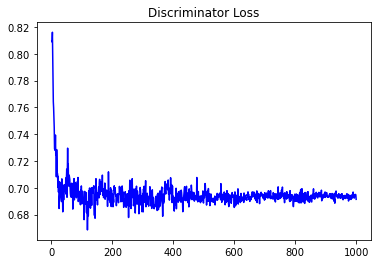

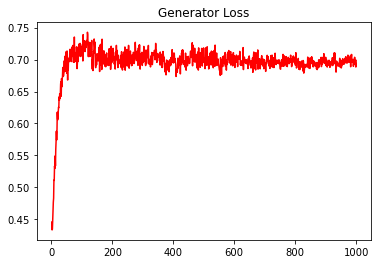

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.8023667639046907


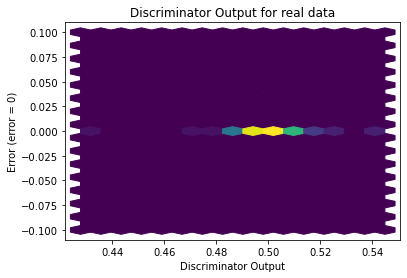

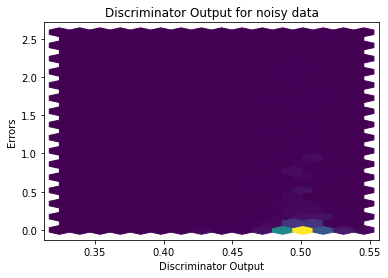

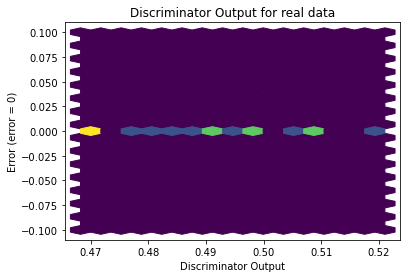

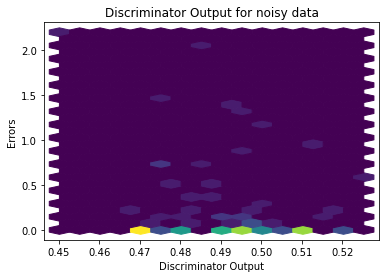

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

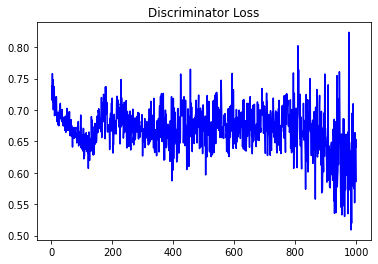

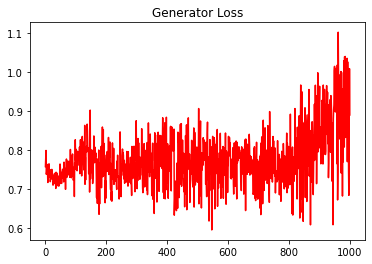

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9762433272227645


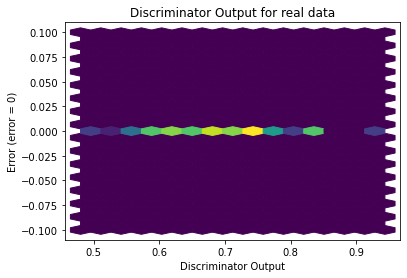

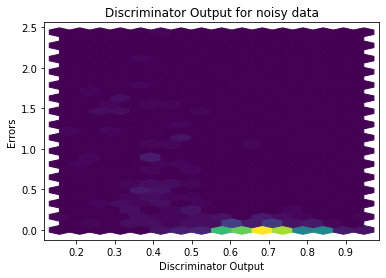

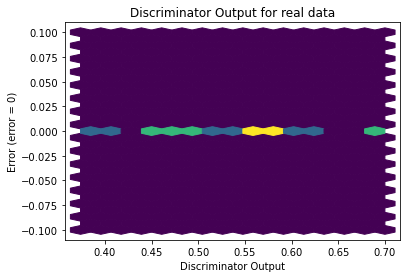

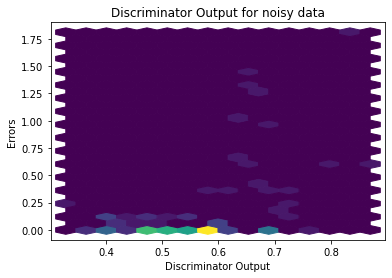

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


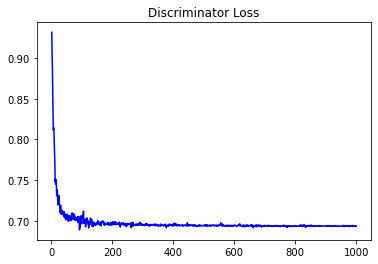

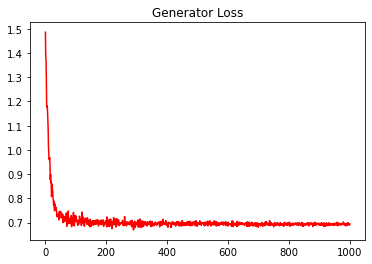

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5070306543791666


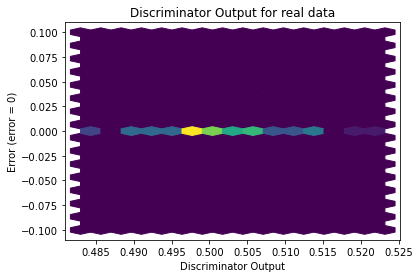

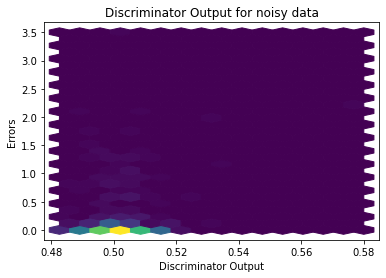

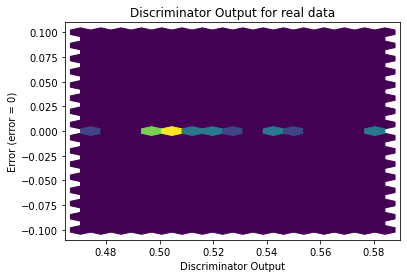

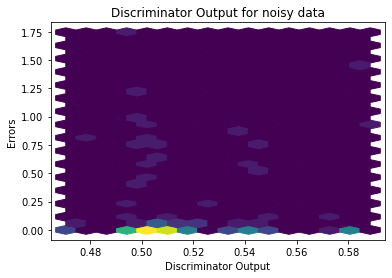

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


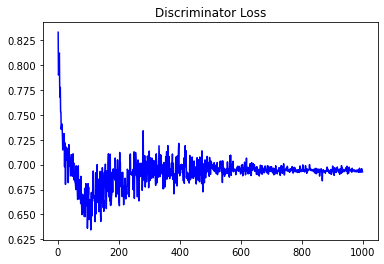

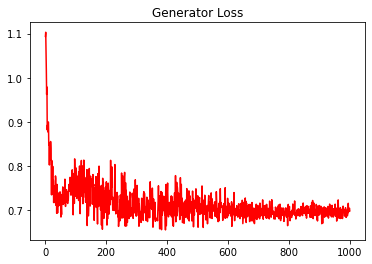

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.7750070682764053


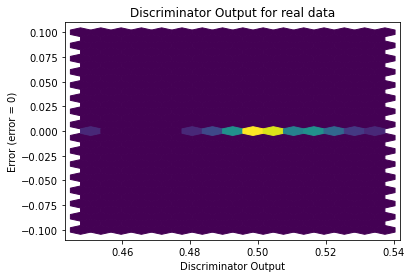

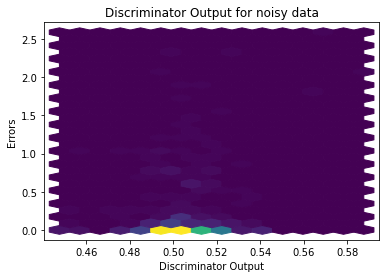

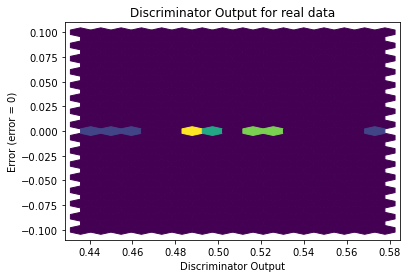

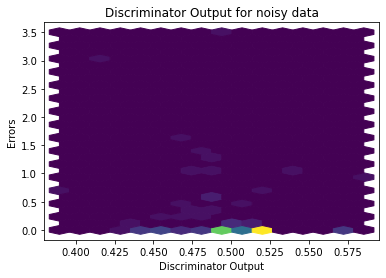

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7144]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1777]], requires_grad=True)
